In [1]:
!pip install opencv-python


     |████████████████████████████████| 40.3 MB 16.7 MB/s eta 0:00:01     |███████████████████▎            | 24.3 MB 16.7 MB/s eta 0:00:01     |██████████████████████          | 27.6 MB 16.7 MB/s eta 0:00:01


In [2]:
import tensorflow as tf

print(tf.__version__)



2.3.1


In [78]:
## Code taken from the DonkeyCar project
## Thanks to W. Roscoe and the DonkeyCar community
def model_categorical(input_size= (130,250,3), dropout=0.1):
    '''Generate an NVIDIA AutoPilot architecture.
    Input_size: Image shape (130, 250, 3), adjust to your desired input.
    Dropout: Proportion of dropout used to avoid model overfitting.
    This model ONLY predicts steering angle as a 5-elements array encoded with a Softmax output.
    The model is already compiled and ready to be trained.
    '''
    import keras
    from keras.layers import Input, Dense, merge
    from keras.models import Model
    from keras.layers import Conv2D, MaxPooling2D, Reshape, BatchNormalization
    from keras.layers import Activation, Dropout, Flatten, Dense
    import tensorflow as tf


    x = keras.models.Sequential()

    

    x.add(tf.keras.Input(shape=(input_size)))    # First layer, input layer, Shape comes from camera.py resolution, RGB
    # more info about conv2D :
    #https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
    #Conv2D(filters, kernel_size, ....)
    x.add(Conv2D(24,(5,5), strides=(2,2), activation='relu'))    # 24 features, 5 pixel x 5 pixel kernel (convolution, feauture) window, 2wx2h stride, relu activation
    x.add(Conv2D(32, (5,5), strides=(2,2), activation='relu'))    # 32 features, 5px5p kernel window, 2wx2h stride, relu activatiion
    x.add(Conv2D(64, (5,5), strides=(2,2), activation='relu'))      # 64 features, 5px5p kernal window, 2wx2h stride, relu
    x.add(Conv2D(64, (3,3), strides=(1,1), activation='relu'))      # 64 features, 3px3p kernal window, 2wx2h stride, relu
    x.add(Conv2D(64, (3,3), strides=(1,1), activation='relu'))      # 64 features, 3px3p kernal window, 1wx1h stride, relu

    # Possibly add MaxPooling (will make it less sensitive to position in image).  Camera angle fixed, so may not to be needed
    x.add(keras.layers.Flatten(name='flattened'))
    x.add(keras.layers.Dense(100, activation='relu'))
    x.add(keras.layers.Dropout(dropout))
    x.add(keras.layers.Dense(50, activation='relu'))
    x.add(keras.layers.Dropout(dropout))
    
    #categorical output of the angle
    x.add(keras.layers.Dense(5, activation='softmax', name='angle_out'))
    
    x.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return x

In [79]:
model=model_categorical()

In [86]:
#DATASET FROM RIGHT AND LEFT IMAGES
from PIL import Image

import os
import cv2

X=[]
Y = []
compteur=0
print('RIGHT\n')
for file_name in os.listdir("/Users/J-Luc/Downloads/A Hard Right"):
    if file_name.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
        img = cv2.imread("/Users/J-Luc/Downloads/A Hard Right/"+file_name)
        X.append(img)
        #Y.append([0,0,0,1,0])
        Y.append([4])
        compteur=compteur+1
print('LEFT\n')

for file_name in os.listdir("/Users/J-Luc/Downloads/A Hard Right"):
    if file_name.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
        img = cv2.imread("/Users/J-Luc/Downloads/A Hard Right/"+file_name)
        X.append(img)
        #Y.append([0,1,0,0,0])
        Y.append([2])
        compteur=compteur+1

RIGHT

LEFT



In [56]:
print(len(Y))
print(len(X))
print(X)

1376
1376
[array([[[ 39,  39,  39],
        [ 41,  41,  41],
        [ 44,  44,  44],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 42,  42,  42],
        [ 43,  43,  43],
        [ 43,  43,  43],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 45,  45,  45],
        [ 44,  44,  44],
        [ 43,  43,  43],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 97,  97,  91],
        [121, 121, 115],
        [117, 116, 112],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[111, 108, 104],
        [131, 128, 124],
        [ 98,  94,  93],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[112, 107, 104],
        [125, 120, 117],
        [ 84,  80,  79],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,

In [87]:
from sklearn.model_selection import train_test_split
print(len)

x_train, x_test, y_train, y_test = train_test_split(X,Y) #by default test = 0.25
x_train = tuple(x_train)
x_test = tuple(x_test)
y_test = tuple(y_test)
y_train = tuple(y_train)
print("x_test :\n")
print(len(x_test))
print(type(x_test))
print("x_train :\n")
#print(x_train)
print(type(x_train))
print(len(x_train))
print("y_train :\n")
print(len(y_train))


<built-in function len>
x_test :

344
<class 'tuple'>
x_train :

<class 'tuple'>
1032
y_train :

1032


In [82]:
print(len(x_train))
print(len(x_test))
print(x_test)

1032
344
(array([[[91, 80, 83],
        [93, 82, 85],
        [96, 85, 88],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[91, 80, 83],
        [93, 82, 85],
        [96, 85, 88],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[91, 80, 82],
        [93, 82, 84],
        [96, 85, 87],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  2,  0],
        [ 4,  5,  3],
        [ 2,  3,  1]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  2,  0],
        [ 4,  5,  3],
        [ 2,  3,  1]]], dtype=uint8), array([[[ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  2,  0],
        ...,
  

In [88]:
import numpy as np
x_train = np.array(x_train).reshape(1032,130,250,3) # Premier parametre = nombre d'images train
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(344,130,250,3)
y_test = np.array(y_test)
print(y_test.shape)
print(x_test.shape)
print(y_train.shape)
print(x_train.shape)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
print(y_test)
print(x_test)

(344, 1)
(344, 130, 250, 3)
(1032, 1)
(1032, 130, 250, 3)
1032
1032
344
344
[[4]
 [4]
 [4]
 [2]
 [4]
 [4]
 [2]
 [4]
 [2]
 [2]
 [2]
 [2]
 [4]
 [2]
 [2]
 [2]
 [4]
 [2]
 [4]
 [2]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [2]
 [4]
 [4]
 [2]
 [2]
 [2]
 [4]
 [2]
 [4]
 [2]
 [4]
 [4]
 [2]
 [4]
 [2]
 [2]
 [4]
 [4]
 [4]
 [2]
 [2]
 [2]
 [2]
 [4]
 [4]
 [2]
 [2]
 [4]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [4]
 [4]
 [2]
 [2]
 [2]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [2]
 [4]
 [4]
 [2]
 [2]
 [2]
 [2]
 [4]
 [2]
 [4]
 [2]
 [2]
 [4]
 [4]
 [2]
 [4]
 [4]
 [2]
 [2]
 [4]
 [4]
 [2]
 [2]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [2]
 [2]
 [4]
 [2]
 [2]
 [4]
 [4]
 [2]
 [2]
 [2]
 [4]
 [2]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [2]
 [2]
 [4]
 [2]
 [2]
 [4]
 [2]
 [4]
 [2]
 [4]
 [2]
 [2]
 [2]
 [2]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [4]
 [2]
 [4]
 [4]
 [2]
 [4]
 [4]
 [4]
 [4]
 [2]
 [4]
 [4]
 [4]
 [2]
 [4]
 [4]
 [4]
 [4]
 [2]
 [4]
 [4]
 [2]
 [2]
 [4]
 [2]
 [2]
 [4]
 [2]
 [2]
 [4]
 [4]
 [4]
 [4]
 [2]
 [2]
 [2]
 [2]

In [89]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
104/104 [==============================] - 24s 229ms/step - loss: 0.9745 - accuracy: 0.4971
Epoch 2/10
104/104 [==============================] - 24s 226ms/step - loss: 0.7429 - accuracy: 0.4864
Epoch 3/10
104/104 [==============================] - 23s 226ms/step - loss: 0.7166 - accuracy: 0.5029
Epoch 4/10
104/104 [==============================] - 24s 233ms/step - loss: 0.7165 - accuracy: 0.4690
Epoch 5/10
104/104 [==============================] - 25s 236ms/step - loss: 0.7159 - accuracy: 0.4622
Epoch 6/10
104/104 [==============================] - 24s 232ms/step - loss: 0.7032 - accuracy: 0.5000
Epoch 7/10
104/104 [==============================] - 23s 225ms/step - loss: 0.6990 - accuracy: 0.5029
Epoch 8/10
104/104 [==============================] - 26s 254ms/step - loss: 0.6995 - accuracy: 0.4952
Epoch 9/10
104/104 [==============================] - 29s 274ms/step - loss: 0.7028 - accuracy: 0.4922
Epoch 10/10
104/104 [==============================] - 30s 291ms/step - l

In [94]:
predictions = model.predict(x_test)

In [92]:
test_loss , test_acc = model.evaluate(x_test , y_test ,verbose =2)
print(test_loss, test_acc)

11/11 - 2s - loss: 0.6948 - accuracy: 0.5233
0.6947891116142273 0.5232558250427246


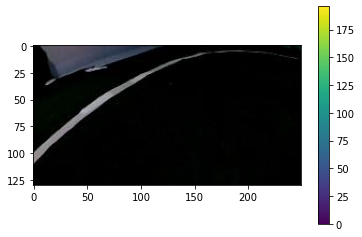

[4]


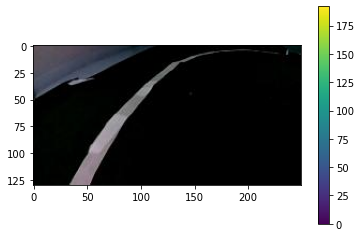

[4]


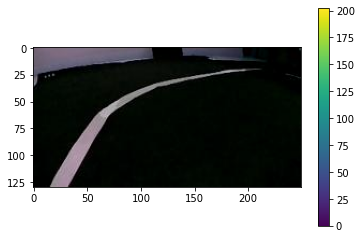

[4]


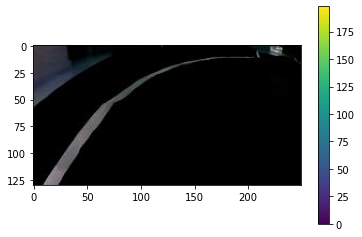

[2]


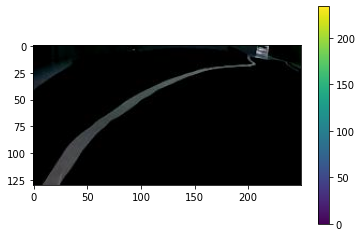

[4]


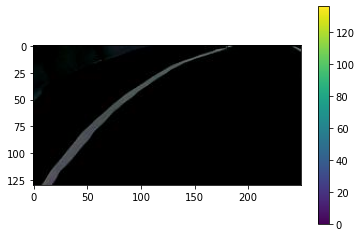

[4]


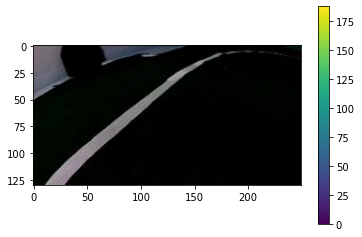

[2]


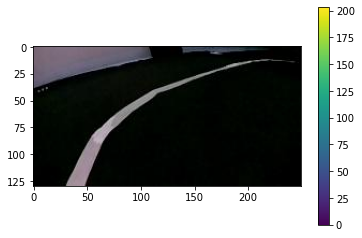

[4]


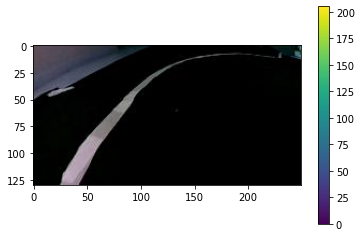

[2]


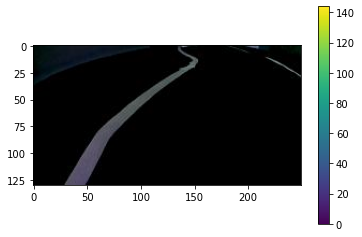

[2]


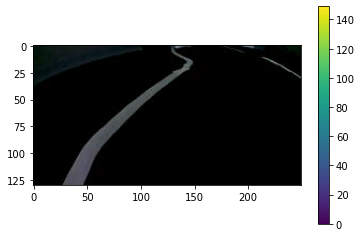

[2]


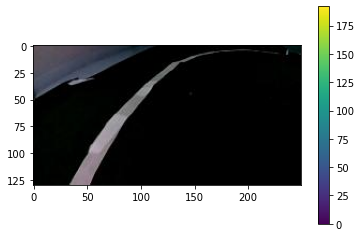

[2]


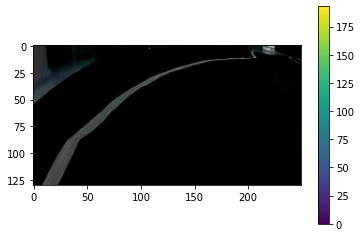

[4]


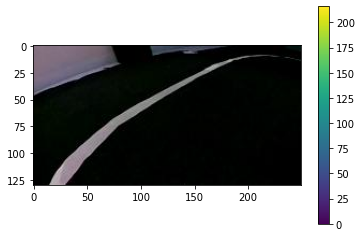

[2]


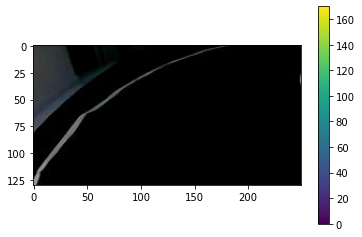

[2]


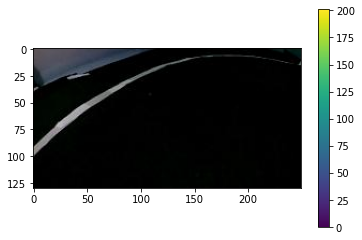

[2]


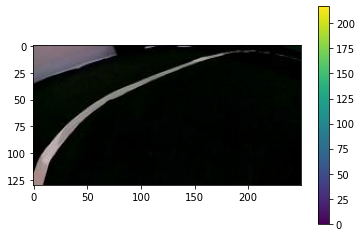

[4]


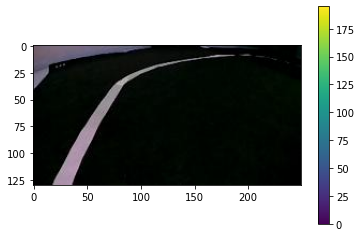

[2]


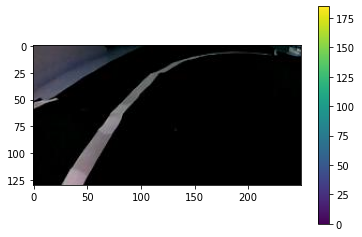

[4]


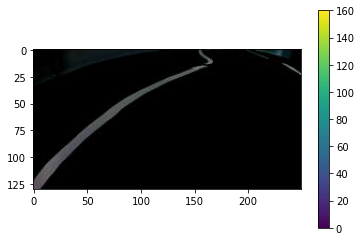

[2]


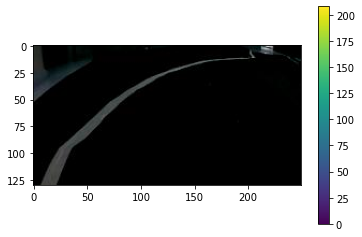

[4]


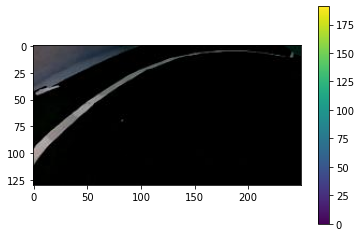

[4]


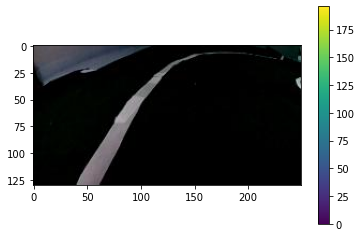

[4]


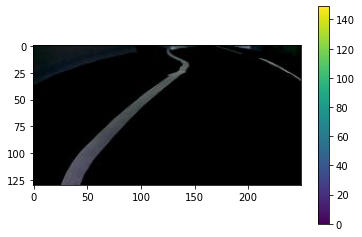

[4]


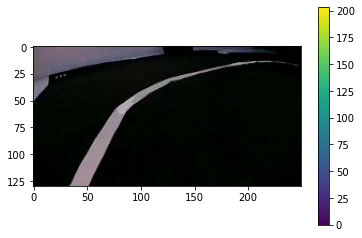

[4]


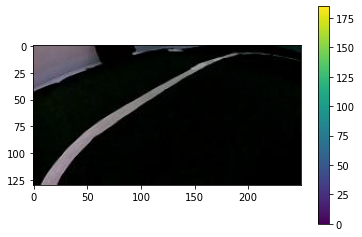

[4]


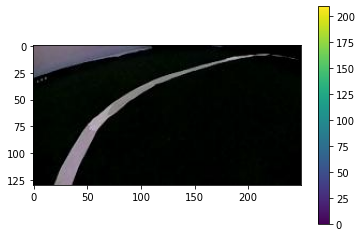

[2]


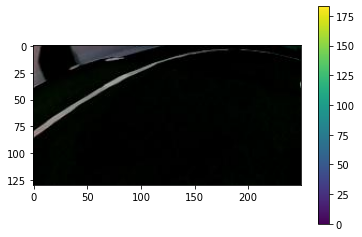

[2]


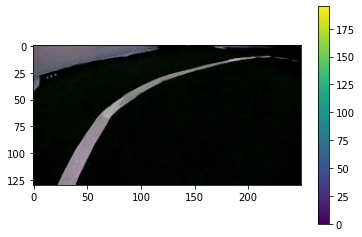

[4]


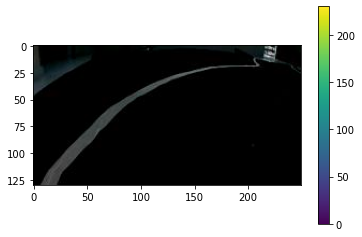

[4]


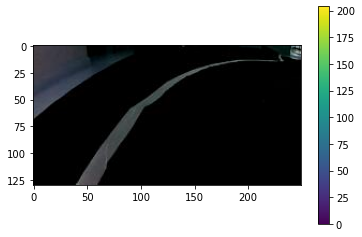

[2]


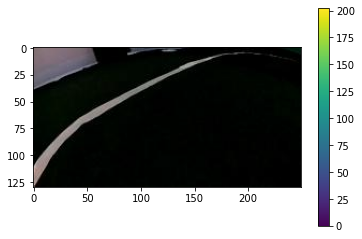

[2]


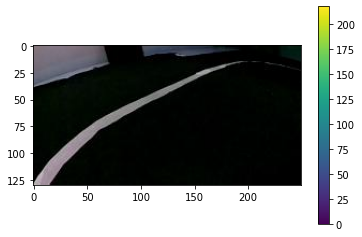

[2]


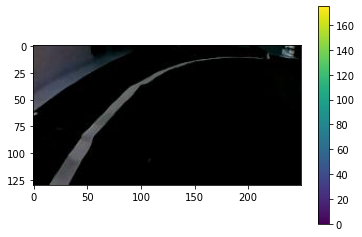

[4]


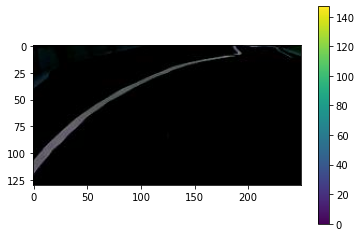

[2]


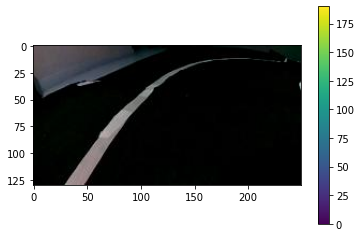

[4]


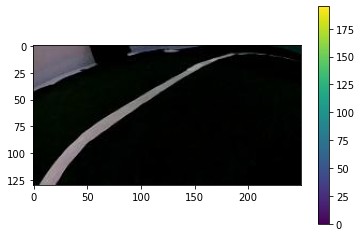

[2]


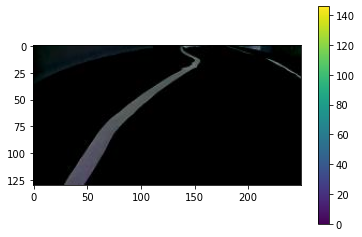

[4]


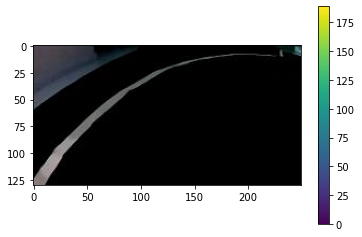

[4]


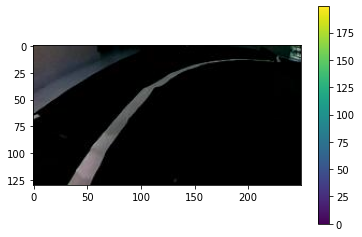

[2]


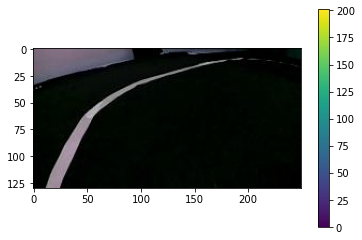

[4]


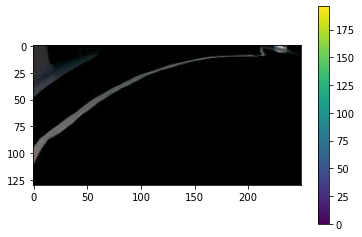

[2]


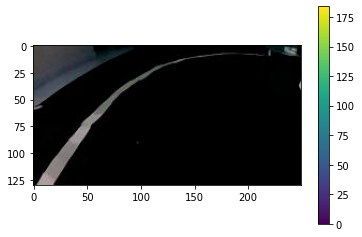

[2]


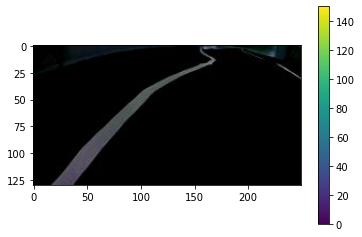

[4]


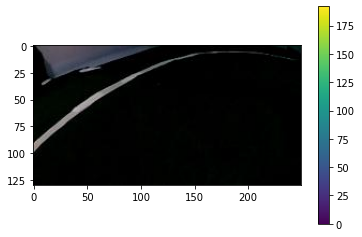

[4]


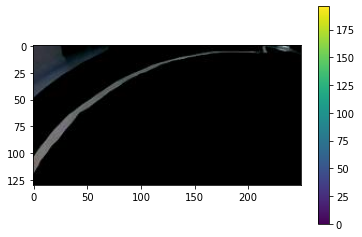

[4]


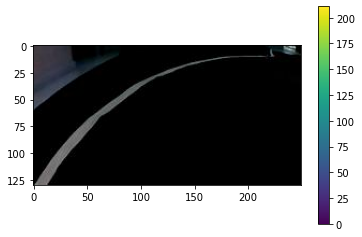

[2]


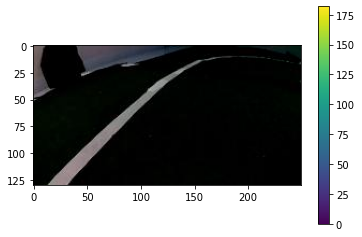

[2]


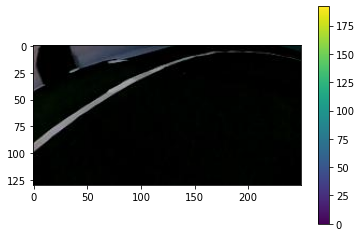

[2]


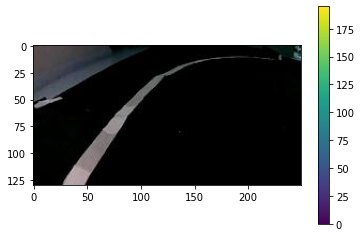

[2]


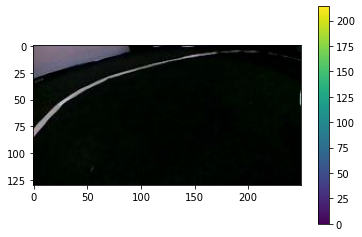

[4]


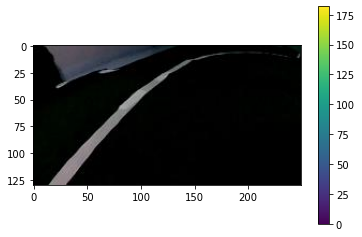

[4]


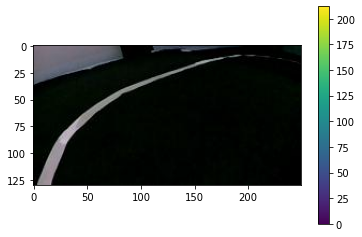

[2]


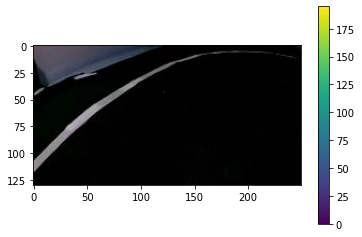

[2]


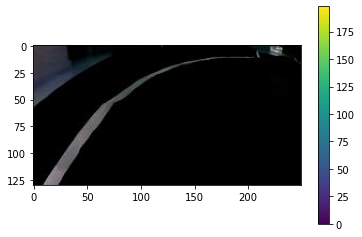

[4]


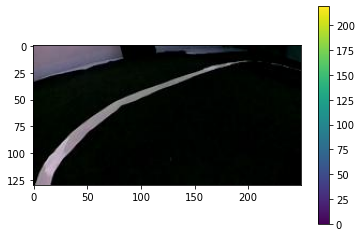

[2]


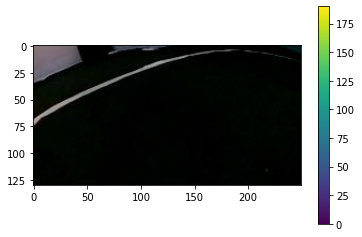

[2]


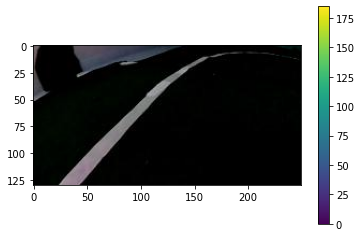

[2]


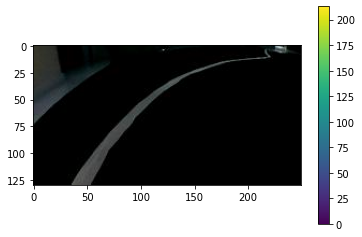

[2]


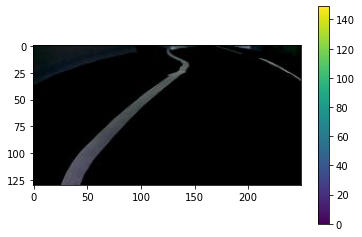

[2]


In [101]:
import matplotlib.pyplot as plt
for index in range(60):
  plt.figure()
  plt.imshow(x_test[index]) 
  plt.colorbar()
  plt.grid(False) 
  plt.show()
  print(y_test[index])

In [110]:
print(predictions[1])
for i in range (60) :
    print(predictions[i])
    print(np.argmax(predictions[i]))
    print(y_test[i])

[6.5667264e-05 2.0519132e-04 4.6966761e-01 3.1167388e-04 5.2974987e-01]
[6.1485262e-05 2.0084115e-04 4.6411672e-01 2.9656143e-04 5.3532445e-01]
4
[4]
[6.5667264e-05 2.0519132e-04 4.6966761e-01 3.1167388e-04 5.2974987e-01]
4
[4]
[2.6617943e-05 9.6126052e-05 4.6746001e-01 1.5650799e-04 5.3226072e-01]
4
[4]
[9.5545933e-05 2.8916585e-04 4.6929240e-01 4.2098830e-04 5.2990192e-01]
4
[2]
[1.0418564e-04 3.0867272e-04 4.7018981e-01 4.5655429e-04 5.2894074e-01]
4
[4]
[1.2866389e-04 3.7020180e-04 4.7047982e-01 5.3626834e-04 5.2848500e-01]
4
[4]
[7.8310186e-05 2.3272373e-04 4.6759060e-01 3.6520517e-04 5.3173316e-01]
4
[2]
[2.95792470e-05 1.03129045e-04 4.67069358e-01 1.64725105e-04
 5.32633245e-01]
4
[4]
[7.0102804e-05 2.2691852e-04 4.6957457e-01 3.3142447e-04 5.2979696e-01]
4
[2]
[1.4183366e-04 3.8640483e-04 4.7065431e-01 5.8079185e-04 5.2823669e-01]
4
[2]
[1.4777192e-04 4.0332749e-04 4.7010106e-01 5.9983309e-04 5.2874798e-01]
4
[2]
[6.5667264e-05 2.0519132e-04 4.6966761e-01 3.1167388e-04 5.29749

In [106]:
model.save('/Users/J-Luc/Downloads/models/model_testLeftRight.hdf5')

In [132]:
# Fit data to model
history = model.fit(x_train, y_train)

ValueError: in user code:

    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    d:\programmes\python\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\programmes\python\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\programmes\python\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    d:\programmes\python\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 86528 but received input with shape (None, 3872768)


In [127]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Scale data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

170500096/170498071 [==============================] - 84s 0us/step
Epoch 1/100
800/800 [==============================] - 138s 172ms/step - loss: 1.5824 - accuracy: 0.4269 - val_loss: 1.0386 - val_accuracy: 0.6342
Epoch 2/100
100/800 [==>...........................] - ETA: 1:54 - loss: 0.9259 - accuracy: 0.6788

KeyboardInterrupt: 